In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/ahead_late_ssb11_flip_x_y_{0:g}_results.sqlite'.format(x))), vals))
# dfs

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [4]:
merged_df = pd.concat(list(dfs.values()))
# merged_df

In [5]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')

for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
# df

In [6]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,82012,11588,1517,2383,0
0.178,71743,19003,2546,4206,2
0.310,56997,28886,4304,7309,4
0.562,37391,39863,7677,12568,1
1.000,18053,45791,12465,21190,1
1.778,5113,41047,18696,32641,3
3.162,657,26443,25730,44665,5
5.623,16,11955,32805,52722,2
10.000,0,4789,42496,50202,10


In [7]:
pivoted / 97500

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,0.841149,0.118851,0.015559,0.024441,0.000000
0.178,0.735826,0.194903,0.026113,0.043138,0.000021
0.310,0.584585,0.296267,0.044144,0.074964,0.000041
0.562,0.383497,0.408851,0.078738,0.128903,0.000010
1.000,0.185159,0.469651,0.127846,0.217333,0.000010
1.778,0.052441,0.420995,0.191754,0.334779,0.000031
3.162,0.006738,0.271210,0.263897,0.458103,0.000051
5.623,0.000164,0.122615,0.336462,0.540738,0.000021
10.000,0.000000,0.049118,0.435856,0.514892,0.000103


In [7]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     ok &  incorrect &  crash &  abnormal &  timeout \\
rate    &        &            &        &           &          \\
\midrule
0.100   &  82012 &      11588 &   1517 &      2383 &        0 \\
0.178   &  71743 &      19003 &   2546 &      4206 &        2 \\
0.310   &  56997 &      28886 &   4304 &      7309 &        4 \\
0.562   &  37391 &      39863 &   7677 &     12568 &        1 \\
1.000   &  18053 &      45791 &  12465 &     21190 &        1 \\
1.778   &   5113 &      41047 &  18696 &     32641 &        3 \\
3.162   &    657 &      26443 &  25730 &     44665 &        5 \\
5.623   &     16 &      11955 &  32805 &     52722 &        2 \\
10.000  &      0 &       4789 &  42496 &     50202 &       10 \\
17.783  &      0 &       2635 &  56821 &     38006 &       20 \\
31.622  &      0 &       1550 &  71814 &     24065 &       40 \\
56.234  &      0 &        590 &  83247 &     13532 &       59 \\
100.000 &      0 &        126 &  89458 &      7730 & 

c:\users\lngtr\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


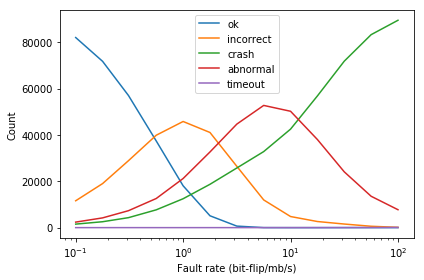

In [8]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

c:\users\lngtr\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


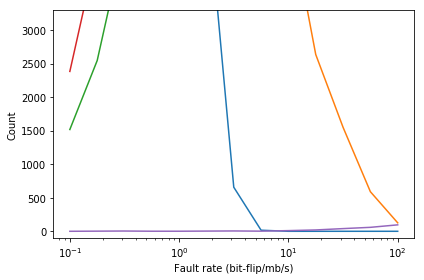

In [9]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.ylim(-100, 3300)
plt.show()

<IPython.core.display.Javascript object>


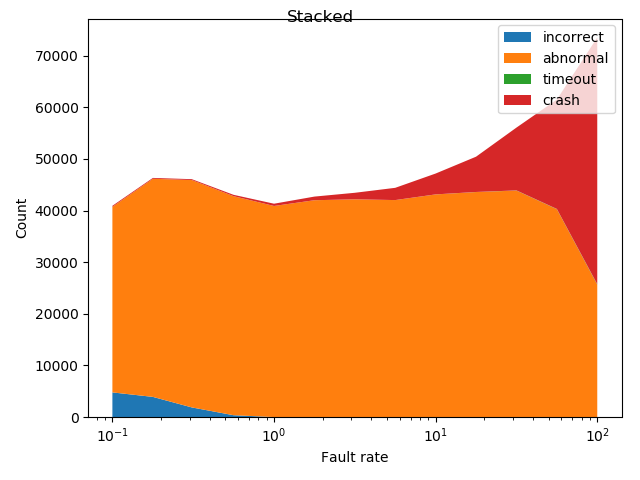

In [15]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


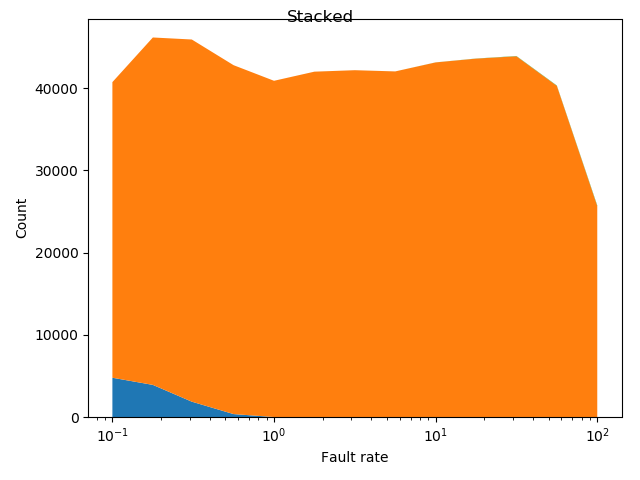

In [17]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


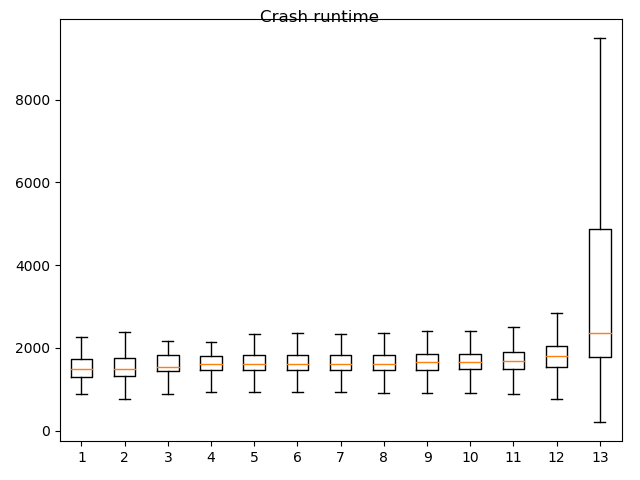

In [18]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


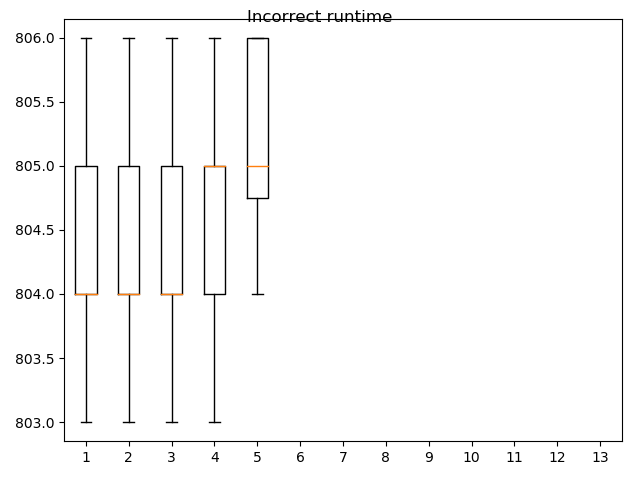

In [19]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


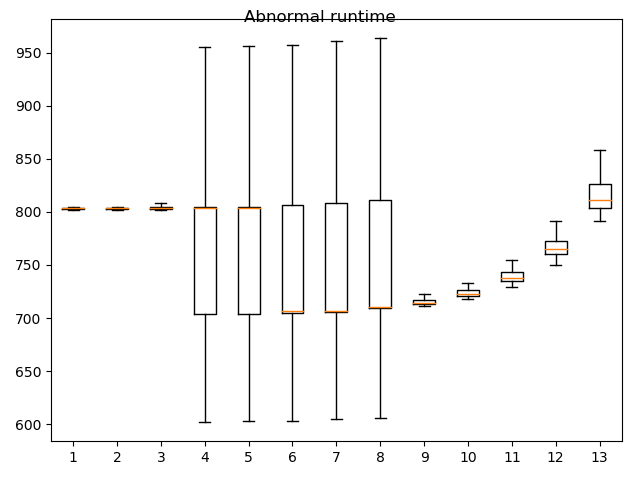

In [16]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


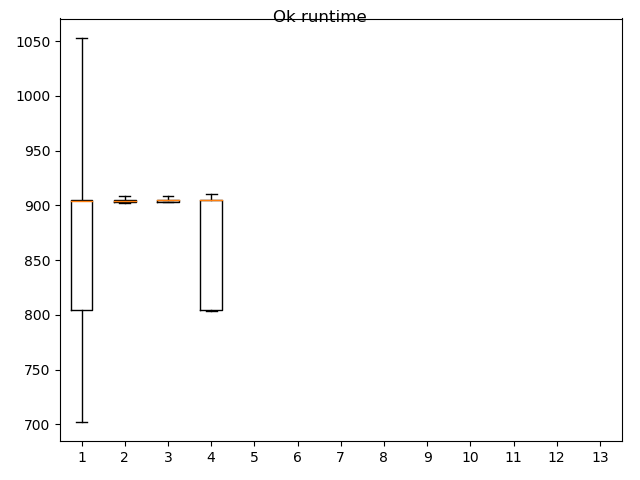

In [20]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [22]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,6,7,8,11
rate,,,,,
0.100,0,80,2,1,110
0.178,0,74,4,0,85
0.310,0,84,2,0,82
0.562,0,115,0,1,140
1.000,0,188,5,1,242
1.778,0,271,6,0,428
3.162,0,519,11,0,733
5.623,1,976,26,5,1363
10.000,0,1653,29,2,2355


<IPython.core.display.Javascript object>


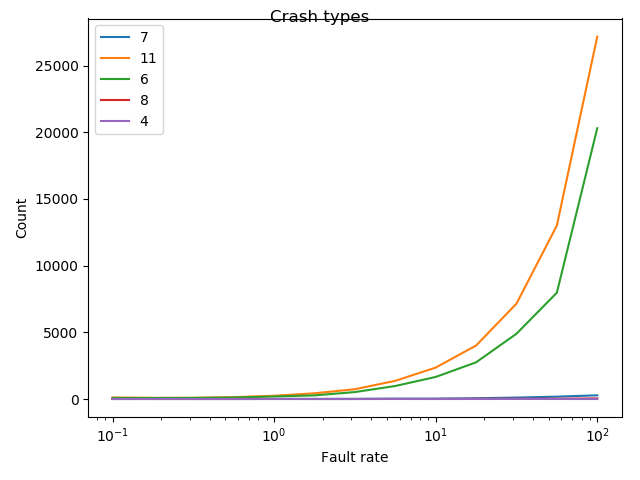

In [23]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()